**References**

  - [Generate fake data for Spring PetClinic with Pandas and Faker](https://www.feststelltaste.de/generate-fake-data-for-spring-petclinic-with-pandas-and-faker/)  
  - [Generating Fake CSV Data With Python](https://blog.dennisokeeffe.com/blog/2021-08-11-generating-fake-csv-data-with-python)  
  - [Generate (fake) data: Populating databases and DataFrames using simple Python packages](https://medium.com/@gilbertbarrios89/generate-fake-data-populating-databases-and-dataframes-using-simple-python-packages-that-can-1b17bc6c0144)  
  - [Faker documentation](https://faker.readthedocs.io/en/latest/)  
  - [Challenge: Two actors who cast together the most](https://www.codewars.com/kata/5818bde9559ff58bd90004a2/sql)

**Table of contents**<a id='toc0_'></a>    
- [Сonnecting to DB, creating tables](#toc1_)    
- [DB inspector](#toc2_)    
- [Data generating](#toc3_)    
  - [Data configuration](#toc3_1_)    
  - [actor table](#toc3_2_)    
  - [film table](#toc3_3_)    
  - [film_actor table](#toc3_4_)    
- [Saving data to DB](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# For data manipulations
import pandas as pd

# Work with DB
import os
from sqlalchemy import create_engine
from sqlalchemy import text
from sqlalchemy import URL
from sqlalchemy.inspection import inspect

# Data generation
import random
from datetime import datetime
from faker import Faker
from faker.providers import BaseProvider

# <a id='toc1_'></a>[Сonnecting to DB, creating tables](#toc0_)

Connect to movies DB with engine (for PostgreSQL you need to install the `psycopg2`).  
My parameters for connecting to DB are stored in a file `.env` (virtual environment).

In [2]:
url_object = URL.create('postgresql',
                        username=os.getenv('user'),
                        password=os.getenv('password'),
                        host=os.getenv('host'),
                        port=os.getenv('port'),
                        database=os.getenv('db'))

engine = create_engine(url_object)

Сreate tables in movies DB, data schema based on [this task](https://www.codewars.com/kata/5818bde9559ff58bd90004a2/sql).

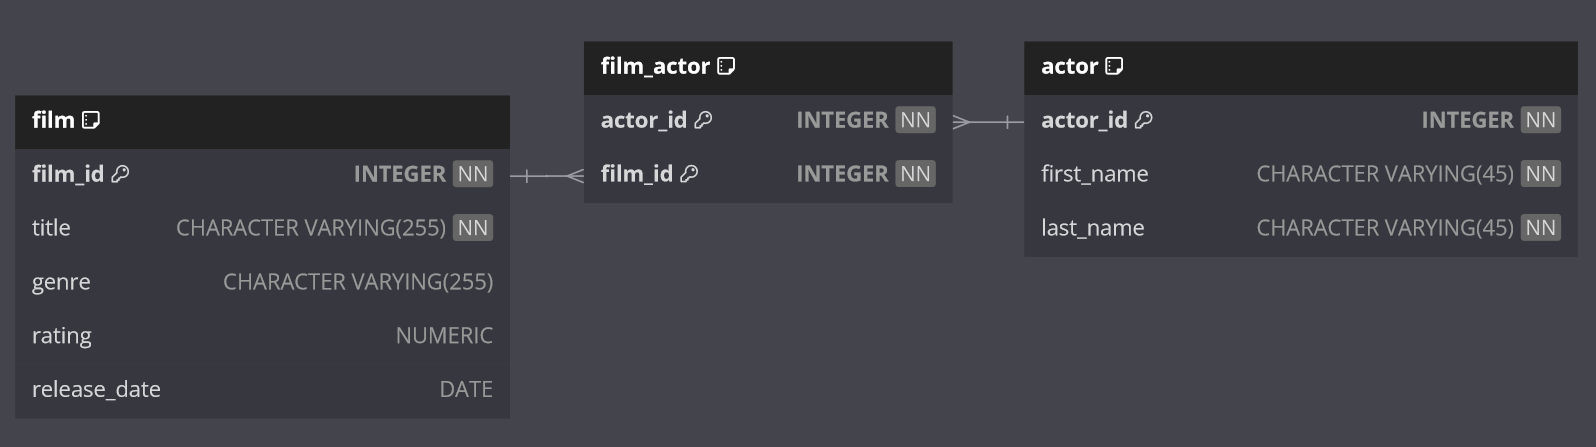

In [3]:
query = """-- sql
CREATE TABLE film (
  film_id INTEGER NOT NULL,
  title CHARACTER VARYING(255) NOT NULL,
  genre CHARACTER VARYING(255),
  rating NUMERIC,
  release_date DATE,
  PRIMARY KEY (film_id)
);

CREATE TABLE actor (
  actor_id INTEGER NOT NULL,
  first_name CHARACTER VARYING(45) NOT NULL,
  last_name CHARACTER VARYING(45) NOT NULL,
  PRIMARY KEY (actor_id)
);

CREATE TABLE film_actor (
  actor_id INTEGER NOT NULL,
  film_id INTEGER NOT NULL,
  PRIMARY KEY (actor_id, film_id),
  FOREIGN KEY (actor_id) REFERENCES actor (actor_id),
  FOREIGN KEY (film_id) REFERENCES film (film_id)
);
"""
with engine.connect() as conn:
    conn.execute(text(query))
    conn.commit()

# <a id='toc2_'></a>[DB inspector](#toc0_)

Define an inspector of DB and check it's some useful features

In [4]:
insp = inspect(engine)

In [5]:
# Default schema
insp.default_schema_name

'public'

In [6]:
# Available get-methods for working with schema
get_methods = [x for x in dir(insp) if x.startswith('get')]
get_methods

['get_check_constraints',
 'get_columns',
 'get_domains',
 'get_enums',
 'get_foreign_keys',
 'get_foreign_table_names',
 'get_indexes',
 'get_materialized_view_names',
 'get_multi_check_constraints',
 'get_multi_columns',
 'get_multi_foreign_keys',
 'get_multi_indexes',
 'get_multi_pk_constraint',
 'get_multi_table_comment',
 'get_multi_table_options',
 'get_multi_unique_constraints',
 'get_pk_constraint',
 'get_schema_names',
 'get_sequence_names',
 'get_sorted_table_and_fkc_names',
 'get_table_comment',
 'get_table_names',
 'get_table_oid',
 'get_table_options',
 'get_temp_table_names',
 'get_temp_view_names',
 'get_unique_constraints',
 'get_view_definition',
 'get_view_names']

In [7]:
# Table names of movies DB
insp.get_table_names()

['actor', 'film_actor', 'film']

In [8]:
# Data types of actor table
pd.DataFrame(insp.get_columns('actor'))

,name,type,nullable,default,autoincrement,comment
0,actor_id,INTEGER,False,None,False,None
1,first_name,VARCHAR(45),False,None,False,None
2,last_name,VARCHAR(45),False,None,False,None


In [9]:
# PK of actor table
insp.get_pk_constraint('actor')

{'constrained_columns': ['actor_id'], 'name': 'actor_pkey', 'comment': None}

In [10]:
# FK of film_actor table
insp.get_foreign_keys('film_actor')

[{'name': 'film_actor_actor_id_fkey',
  'constrained_columns': ['actor_id'],
  'referred_schema': None,
  'referred_table': 'actor',
  'referred_columns': ['actor_id'],
  'options': {},
  'comment': None},
 {'name': 'film_actor_film_id_fkey',
  'constrained_columns': ['film_id'],
  'referred_schema': None,
  'referred_table': 'film',
  'referred_columns': ['film_id'],
  'options': {},
  'comment': None}]

# <a id='toc3_'></a>[Data generating](#toc0_)

Get some real looking data using the fake data provider Faker.

In [11]:
# Initialize the Faker object
fake = Faker()

In [12]:
type(fake)

faker.proxy.Faker

In [13]:
# Example of random profile
fake.profile()

{'job': 'Research scientist (medical)',
 'company': 'Coleman, Dyer and Wilson',
 'ssn': '474-09-1826',
 'residence': '5750 Benton Walk Suite 022\nAndreshaven, GU 61722',
 'current_location': (Decimal('-70.8245615'), Decimal('-43.395767')),
 'blood_group': 'A+',
 'website': ['https://cruz-reynolds.com/',
  'http://www.christian.net/',
  'http://clayton.biz/',
  'http://www.schmidt.com/'],
 'username': 'jessicasimpson',
 'name': 'Brittany Brown',
 'sex': 'F',
 'address': '27356 Webb Circles\nNorth Blakestad, GU 83950',
 'mail': 'ihammond@hotmail.com',
 'birthdate': datetime.date(1939, 6, 6)}

## <a id='toc3_1_'></a>[Data configuration](#toc0_)

In [14]:
FILMS_COUNT = 100                 # 100 films
ACTORS_COUNT = 3 * FILMS_COUNT    # 300 actors

## <a id='toc3_2_'></a>[actor table](#toc0_)

In [15]:
# Structure of actor table
pd.DataFrame(insp.get_columns('actor'))

,name,type,nullable,default,autoincrement,comment
0,actor_id,INTEGER,False,None,False,None
1,first_name,VARCHAR(45),False,None,False,None
2,last_name,VARCHAR(45),False,None,False,None


In [16]:
# Filling of index (actor_id PK) from 1 to AMOUNT_ACTORS
actor = pd.DataFrame(index=range(1, ACTORS_COUNT + 1))
actor.index.name ='actor_id'

# Data generating for first_name and last_name
actor['first_name'] = actor.index.map(lambda x: fake.first_name())
actor['last_name'] = actor.index.map(lambda x: fake.last_name())

In [17]:
actor.head()

,first_name,last_name
actor_id,,
1,Scott,Long
2,Lisa,Simon
3,Matthew,Lee
4,Judith,Dunn
5,Emily,Beltran


## <a id='toc3_3_'></a>[film table](#toc0_)

In [18]:
# Structure of film table
pd.DataFrame(insp.get_columns('film'))

,name,type,nullable,default,autoincrement,comment
0,film_id,INTEGER,False,None,False,None
1,title,VARCHAR(255),False,None,False,None
2,genre,VARCHAR(255),True,None,False,None
3,rating,NUMERIC,True,None,False,None
4,release_date,DATE,True,None,False,None


In [19]:
# Index filling (film_id PK)
film = pd.DataFrame(index=range(1, FILMS_COUNT + 1))
film.index.name = 'film_id'

You can create your own provider for some data:

In [20]:
# Create a new provider class for film.genre
class GenereProvider(BaseProvider):
    def film_genre(self):
        return random.choice(['Documentary', 'Thriller', 'Mystery',
                              'Horror', 'Action', 'Comedy', 'Drama', 'Romance'])

# Add new provider to Faker instance
fake.add_provider(GenereProvider)

In [21]:
# Get film.title
def get_film_title():
    words = fake.words()   # Returns 3 words
    capitalized_words = list(map(lambda x: x.capitalize(), words))
    return ' '.join(capitalized_words)


# Get film.rating [1.0, 10.0)
def get_film_rating():
    return round(random.uniform(1.0, 10.0), 1)


# Get film.date
def get_film_date():
    return datetime.strftime(fake.date_time_this_decade(), '%Y-%m-%d')

In [22]:
# Data generating for film table
film['title'] = film.index.map(lambda x: get_film_title())
film['genre'] = film.index.map(lambda x: fake.film_genre())
film['rating'] = film.index.map(lambda x: get_film_rating())
film['release_date'] = film.index.map(lambda x: get_film_date())

In [23]:
film.head()

,title,genre,rating,release_date
film_id,,,,
1,Become Teacher There,Action,8.3,2023-05-11
2,Star Will Machine,Action,8.4,2021-08-09
3,Go Admit Actually,Documentary,1.1,2023-11-17
4,Possible Early Two,Comedy,7.8,2021-08-26
5,Almost Cost Receive,Documentary,8.7,2023-05-20


## <a id='toc3_4_'></a>[film_actor table](#toc0_)

In [24]:
# Structure of film_actor table
pd.DataFrame(insp.get_columns('film_actor'))

,name,type,nullable,default,autoincrement,comment
0,actor_id,INTEGER,False,None,False,None
1,film_id,INTEGER,False,None,False,None


Get already existing entries (`actor_id` and `film_id`) from `actor` and `film` tables.  
Put initial film_actor len like `n x m = 30 000 rows`.

In [25]:
# Filling film_actor.film_id from film.film_id
# and film_actor.actor_id from actor.actor_id
film_actor = pd.DataFrame({'film_id': film.sample(len(actor) * len(film), replace=True).index,
                           'actor_id': actor.sample(len(actor) * len(film), replace=True).index})

film_actor = film_actor.drop_duplicates().set_index(['film_id', 'actor_id'])

film_actor

Empty DataFrame
Columns: []
Index: [(53, 200), (18, 13), (18, 190), (46, 198), (77, 15), (26, 173), (49, 149), (45, 274), (49, 151), (93, 263), (80, 163), (28, 278), (83, 174), (1, 76), (36, 292), (87, 66), (79, 194), (78, 201), (22, 10), (21, 127), (40, 283), (48, 110), (48, 103), (89, 294), (15, 49), (63, 75), (1, 280), (88, 164), (51, 114), (33, 8), (100, 2), (20, 265), (76, 197), (99, 20), (62, 57), (10, 252), (65, 50), (7, 296), (11, 12), (76, 61), (24, 96), (40, 188), (91, 68), (2, 100), (57, 261), (10, 162), (76, 288), (49, 220), (93, 282), (55, 154), (76, 259), (97, 238), (13, 297), (24, 125), (44, 103), (74, 208), (27, 231), (19, 250), (59, 295), (67, 22), (89, 229), (57, 162), (76, 125), (43, 177), (8, 13), (34, 6), (32, 121), (88, 26), (50, 82), (71, 300), (100, 9), (74, 141), (54, 87), (39, 163), (86, 57), (74, 67), (43, 204), (36, 138), (91, 113), (87, 43), (9, 13), (54, 233), (70, 37), (36, 9), (26, 11), (37, 210), (18, 255), (23, 140), (9, 191), (66, 72), (49, 4), (45, 33), (47, 212), (12, 203), (37, 13), (89, 64), (5, 164), (68, 219), (31, 132), (44, 11), ...]

[18927 rows x 0 columns]

# <a id='toc4_'></a>[Saving data to DB](#toc0_)

In [26]:
def store(df, table_name):
    df.to_sql(table_name, con=engine, if_exists='append', chunksize=100)

store(actor, 'actor')
store(film, 'film')
store(film_actor, 'film_actor')

In [27]:
engine.dispose()

Now you can use movies DB with fake data.  
For example, I found two actors who cast together the most and list titles of only those movies they were casting together:

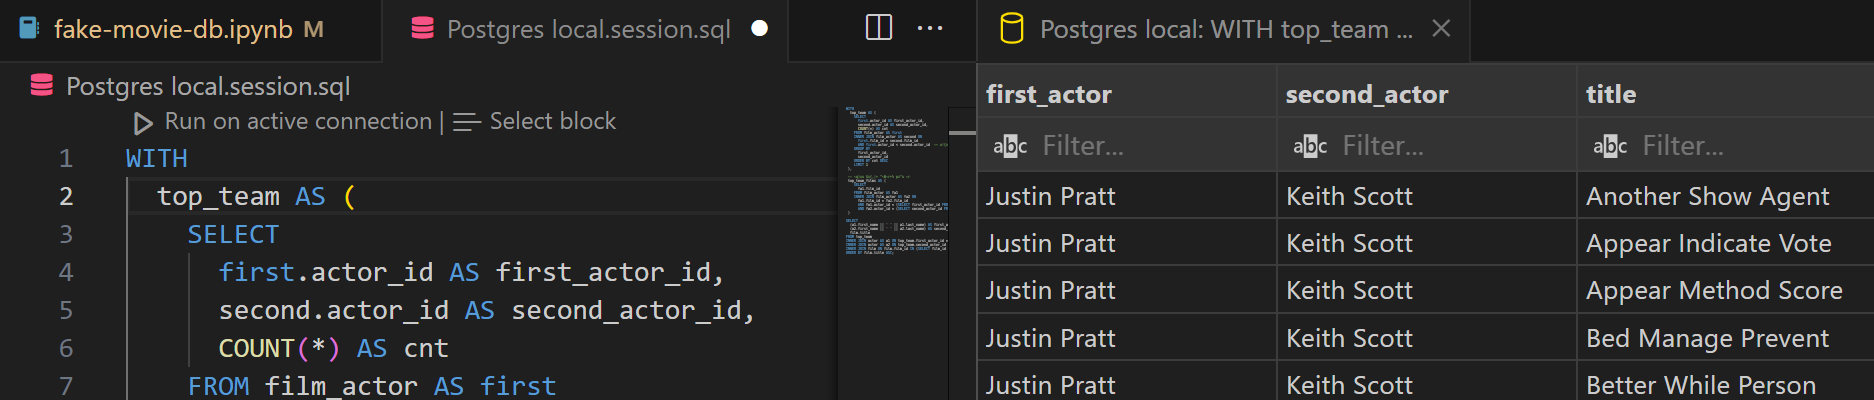